# Medium Nurdle Image Processing (Method 2)

Import packages.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random as rng

Read image and convert to grayscale.

In [2]:
img = cv.imread('Medium Nurdles - Dark JPG.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Cropped the ruler out from the image because it was messing with the binarization.

In [3]:
img = img[0:1734,:]

Binarize the image with adaptive threshold.

In [4]:
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,401,-12)

Erode & dilate the image.

In [5]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
th2 = cv.erode(th2, kernel, iterations=1)
th2 = cv.dilate(th2, kernel, iterations=1)

True

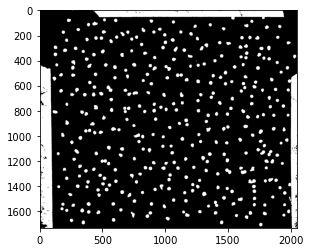

In [6]:
plt.imshow(th2,'gray')
cv.imwrite('threshImageMedium.png', th2)

Find the contours.

In [7]:
contours, hierarchy = cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

Go through each of the contours, find the minimum area rectangle bounding each contour, and store the largest dimension of the rectangles (representing the length of the rod particle). Make sure to ignore background noise or masking tape readings.

In [8]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
rng.seed(12345)

lengths = [None]*len(contours)
final_contours = [None]*len(contours)
ratios = [None]*len(contours)

radii = [None]*len(contours)

# find diameters of the nurdles and draw the circular boundaries
for i, c in enumerate(contours):
    if c.shape[0] > 5:
        area = cv.contourArea(c)
        r2 = area/np.pi
        r = np.sqrt(r2)
        minRect = cv.minAreaRect(c)
        x = max(minRect[1])
        y = min(minRect[1])
        if r < 23.0 and r > 10.0 and (x/y) < 2.0:
            radii[i] = r
            final_contours[i] = c
            ratios[i] = x/y
            
final_contours2 = list(filter(lambda item: item is not None, final_contours))

for i, c in enumerate(final_contours2):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(img_color, final_contours2, i, color)

cv.imshow('Contours', img_color)

True

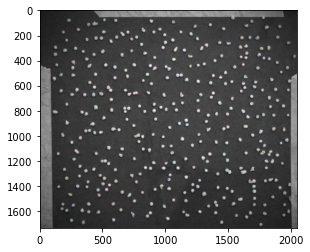

In [9]:
plt.imshow(img_color)
cv.imwrite('shapeImageMedium.png', img_color)

Remove the "None" values in the "radii" and "ratios" array. The None values are unrecorded lengths of noise and masking tape boundary rectangles.

In [10]:
raw_radii = list(filter(lambda item: item is not None, radii))
raw_ratios = list(filter(lambda item: item is not None, ratios))

Multiple the radii by 2, to convert them into diameter values

In [11]:
raw_diameters = np.multiply(raw_radii,2)

Convert the raw lengths from pixels to cm. I used Paint to find the conversion value from pixels to cm, and then multiplied the value by 10 to convert from cm to mm.

In [12]:
PixelsInMM = 170/1849

In [13]:
lengths_mm = np.multiply(raw_diameters,PixelsInMM)

Find the number of particles in the sample.

In [14]:
print(len(lengths_mm))

362


Find the minimum diameter value in the sample.

In [15]:
np.min(lengths_mm)

2.0063323263711856

Find the maximum diameter value in the sample.

In [16]:
np.max(lengths_mm)

3.8574440849453886

Find the sample mean.

In [17]:
np.mean(lengths_mm)

2.501007896935188

Find the sample standard deviation.

In [18]:
np.std(lengths_mm)

0.2585557720037867

Plot a histogram of the medium nurdle diameters.

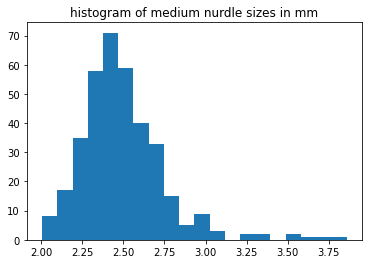

In [22]:
plt.hist(lengths_mm,bins=20) 
plt.title("histogram of medium nurdle sizes in mm") 
plt.show()

Plot a histogram of the medium nurdle aspect ratios.

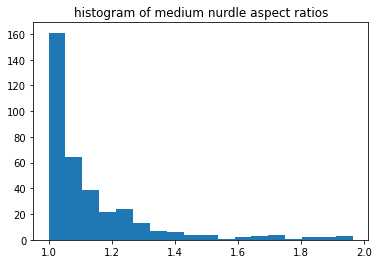

In [20]:
plt.hist(raw_ratios,bins=18) 
plt.title("histogram of medium nurdle aspect ratios") 
plt.show()